### 数据集构建

假设要拟合的非线性函数是一个缩放后的sin函数

In [19]:
import sys; sys.path.append("..")
import warnings; warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import torch
import math
torch.manual_seed(42)
from nndl.dataset import create_toy_data
import matplotlib.pyplot as plt

# sin函数: sin(2 * pi * x)
def sin(x):
    y = torch.sin(2 * math.pi * x)
    return y

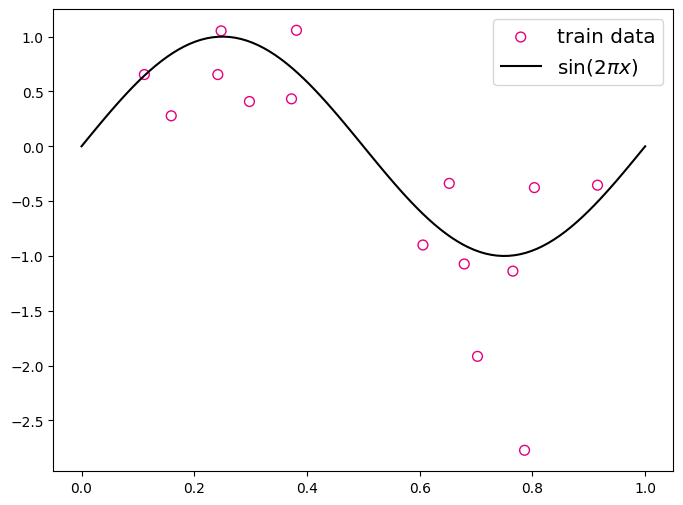

In [23]:
func = sin
interval = (0, 1)
train_num = 15
test_num = 10
noise = 0.5 # 0.1
X_train, y_train = create_toy_data(func=func, interval=interval, sample_num=train_num, noise=noise)
X_test, y_test = create_toy_data(func=func, interval=interval, sample_num=test_num, noise=noise)

X_underlying = torch.linspace(interval[0], interval[1], 100)
y_underlying = sin(X_underlying)

# 绘制图像
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.scatter(X_train, y_train, facecolor="none", edgecolor='#e4007f', s=50, label="train data")
#plt.scatter(X_test, y_test, facecolor="none", edgecolor="r", s=50, label="test data")
plt.plot(X_underlying, y_underlying, c='#000000', label=r"$\sin(2\pi x)$")
plt.legend(fontsize='x-large')
plt.savefig('ml-vis4.png')
plt.show()

### 模型构建

多项式回归和线性回归一样，同样学习参数 $w$, 只不过需要对输入特征 $\phi(x)$ 根据多项式阶数进行变换.因此,我们可以套用求解线性回归参数的方法来求解多项式回归参数